# Project 2: Computer-aided diagnosis

**Contents:** <br>

- [Goal](#goal)<br>
- [Deliverables](#deliverables)<br>
- [Assessment](#assessment)<br>

- [Guided project work](#guided_work)<br>

    A. [Linear regression for nuclei area measurement](#section_1)<br>
    
    B. [Logistic regression for nuclei classification](#section_2)<br>

    C. [Neural network training for nuclei classification](#section_3)<br>

    D. [Using k-NN for nuclei classification](#section_4)<br>
        

<div id='references'></div>

**References:**<br>

[1] Veta M., van Diest P.J., Pluim J.P.W. 2016. Cutting Out the Middleman: Measuring Nuclear Area in Histopathology Slides Without Segmentation. Medical Image Computing and Computer-Assisted Intervention. [LINK](https://www.doi.org/10.1007/978-3-319-46723-8_73)

[2] Graham, S., Vu, Q. D., Raza, S. E. A., Azam, A., Tsang, Y. W., Kwak, J. T., & Rajpoot, N. 2019. Hover-net: Simultaneous segmentation and classification of nuclei in multi-tissue histology images. Medical Image Analysis, 58, 101563. [LINK](https://doi.org/10.1016/j.media.2019.101563)

<div id='goal'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

**Clarification:** Following the guided project work below, completing the programming tasks and answering the theory questions, is the minimal solution to this project. If accompanied by a suitable report, this will be graded with a ‘sufficient’ grade.

To achieve higher grades, you are expected to go beyond the minimal solution. You should use what you have implemented and the available data to come up with and answer a suitable research question. Write about this in your report.

## Goal
Implement and apply linear regression, logistic regression, a neural network and $k$-NN for classifying nuclei size in histopathology images, and evaluate and analyze the results.

The size of the cell nuclei of the tumor in breast cancer patients can be indicative of the outcome. Large nuclei size indicates more aggressive tumor and in turn worse prognosis for the patient. As part of their routine work, pathologists make qualitative evaluation of the size of the nuclei by examining the tissue under a microscope. Quantitative measurement (e.g. by manual segmentation) is a much better solution, however, it is unfeasible as it takes additional time away from the busy pathologists. A solution to this problem is to develop an automatic method for measurement of nuclei area.

All data required for this mini-project is provided with the code handout. In the exercises, you applied regression and classification methods on toy datasets, and in the project work you will apply the same methods to a dataset of RGB images of nuclei with size $24\times24$ pixels. The images originate from the dataset that was previously described in [Veta et al. (2015)](#references). 

<div id='deliverables'></div>

## Deliverables
There is no hard limit for the length of the report, however, concise and short reports are **strongly** encouraged. Aim to present your most important findings in the main body of the report and (if needed) any additional information in an appendix. The following report structure is suggested for the main body of the report:

1. Introduction
2. Methods
3. Results
4. Discussion

The introduction and result sections can be very brief in this case (e.g. half a page each). The discussion section should contain the analysis of the results.

The report must be submitted as a single PDF file. The code must be submitted as a single archive file (e.g. zip) that is self-contained and can be used to reproduce the results in the report. 

Note that there is not a single correct solution for the project. You have to demonstrate to the reader that you understand the methods that you have studied and can critically analyze the results of applying the methods. Below, you can find a set of assignments (guided project work) that will help you get started with the project work and when correctly completed will present you with a **minimal solution**. Solutions which go beyond these assignments are of course encouraged. 

Code and a report describing your implementation, results and analysis. 

Your report must contain a paragraph describing the contributions of each group member which can be used to to adjust individual grades to reflect a student’s (lack of) contribution to the group


## Assessment
The rubric that will be used for assessment of the project work is given in [this table](https://github.com/tueimage/8dc00-mia/blob/master/rubric.md)

<div id='assessment'></div>

In [1]:
%load_ext autoreload
%autoreload 2

<div id='guided_work'></div>

## Guided project work

<div id='section_1'></div>

### A. Linear regression for nuclei area measurement

The Python function `nuclei_measurement()` implements training of a linear regression model for measuring the area of nuclei in microscopy images. The dataset for this problem consists of small RGB images of size $24 \times 24$ pixels with a nucleus in the center. Such images can be obtained, for example, by cropping from larger images after performing a nuclei detection step. The targets are the areas of the  nucleus in the center of the image obtained by manual measurement. The linear regression model that we are going to train will enable us to automatically measure the size of new, previously unseen samples (without resorting to manual measurement).

The first section of code loads and prepares the dataset. The data is already split into a training and testing set, each containing more than $20,000$ samples (a validation dataset is not needed as we are not going to perform model selection, i.e. we are going to stick to linear regression). The last few lines of the first section of code visualize the $300$ smallest and $300$ largest nuclei in the training dataset.

In this example, we are not going to perform feature extraction but use the raw pixel values as features. Since each sample is an RGB image with size $24 \times 24$ pixels, we end up with $24 \times 24 \times 3=1728$ features. Locate the code that reshapes each image into a feature vector and make sure you understand how it works. 

Full Model MSE: 21.249374449040975
Reduced Model MSE: 26.936126784213453


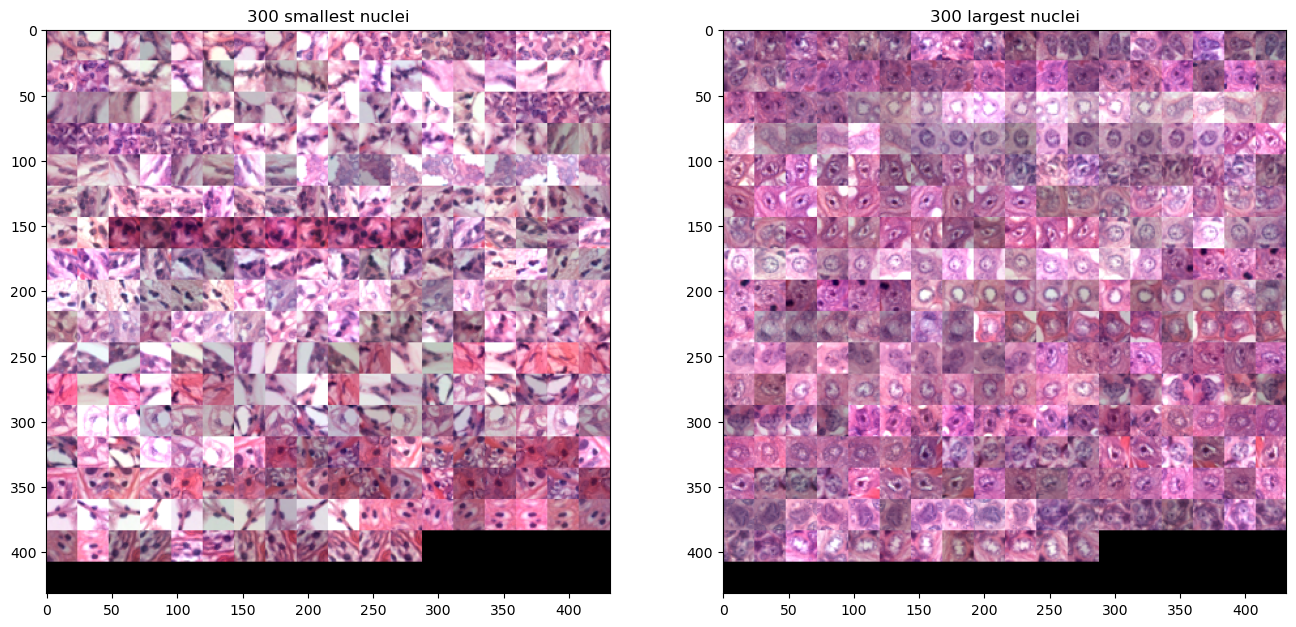

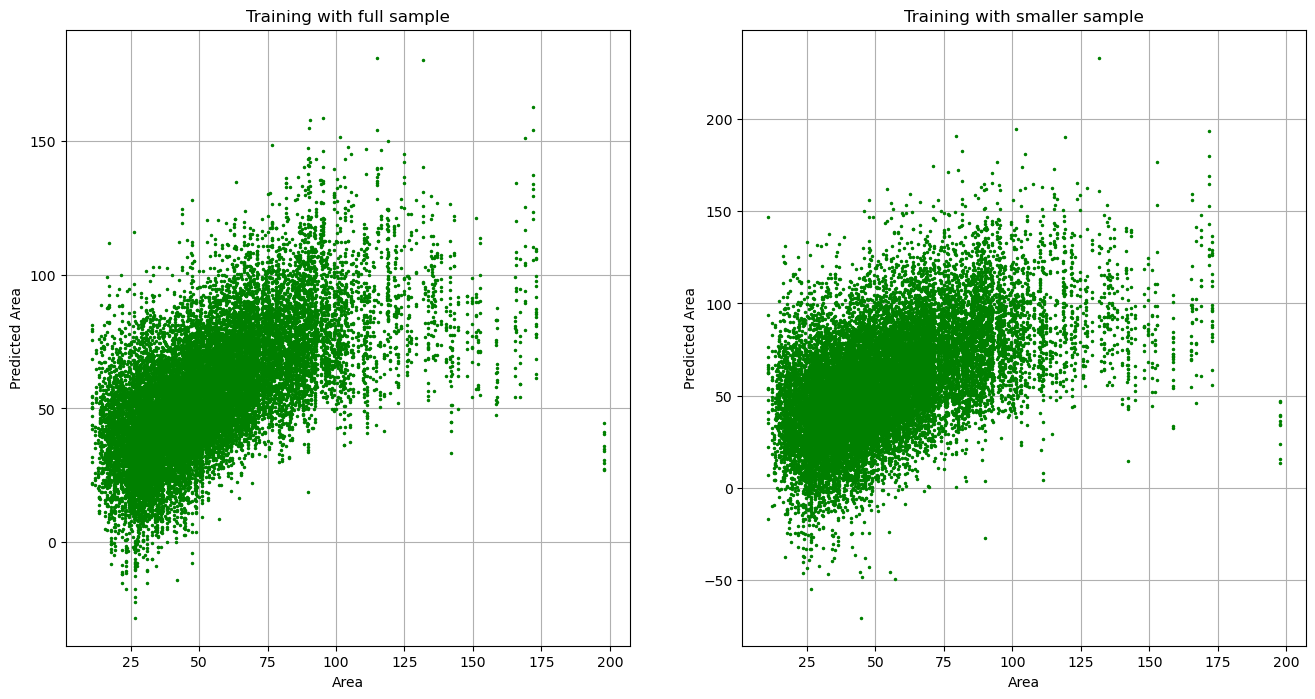

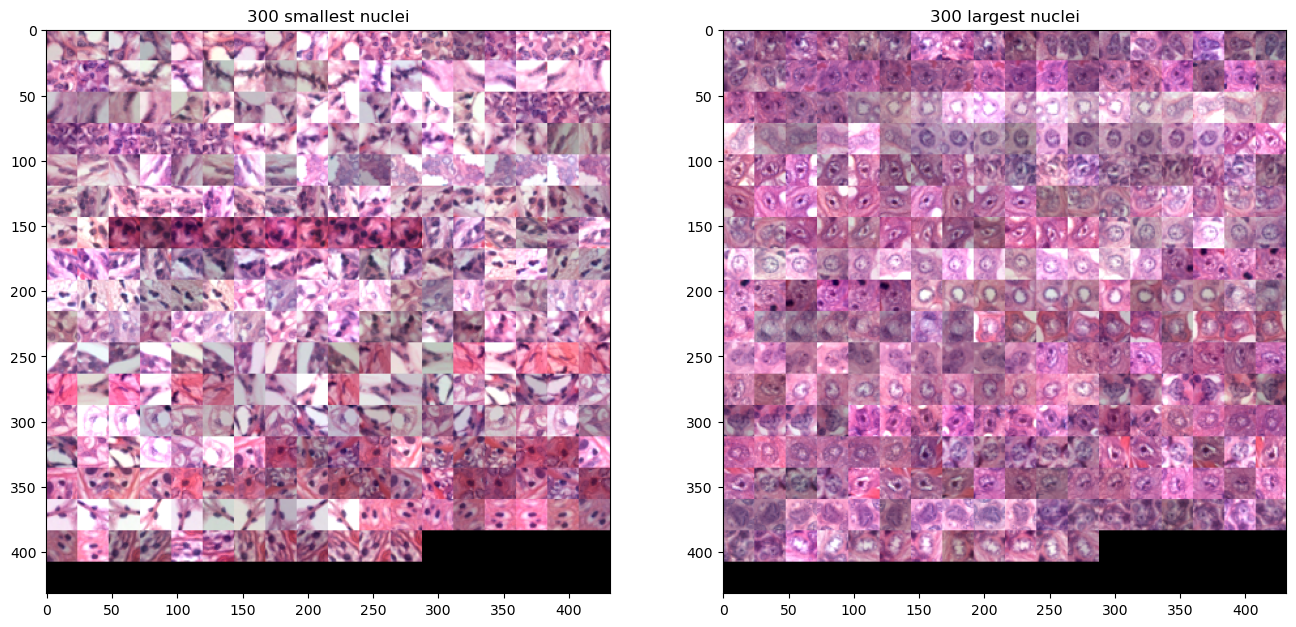

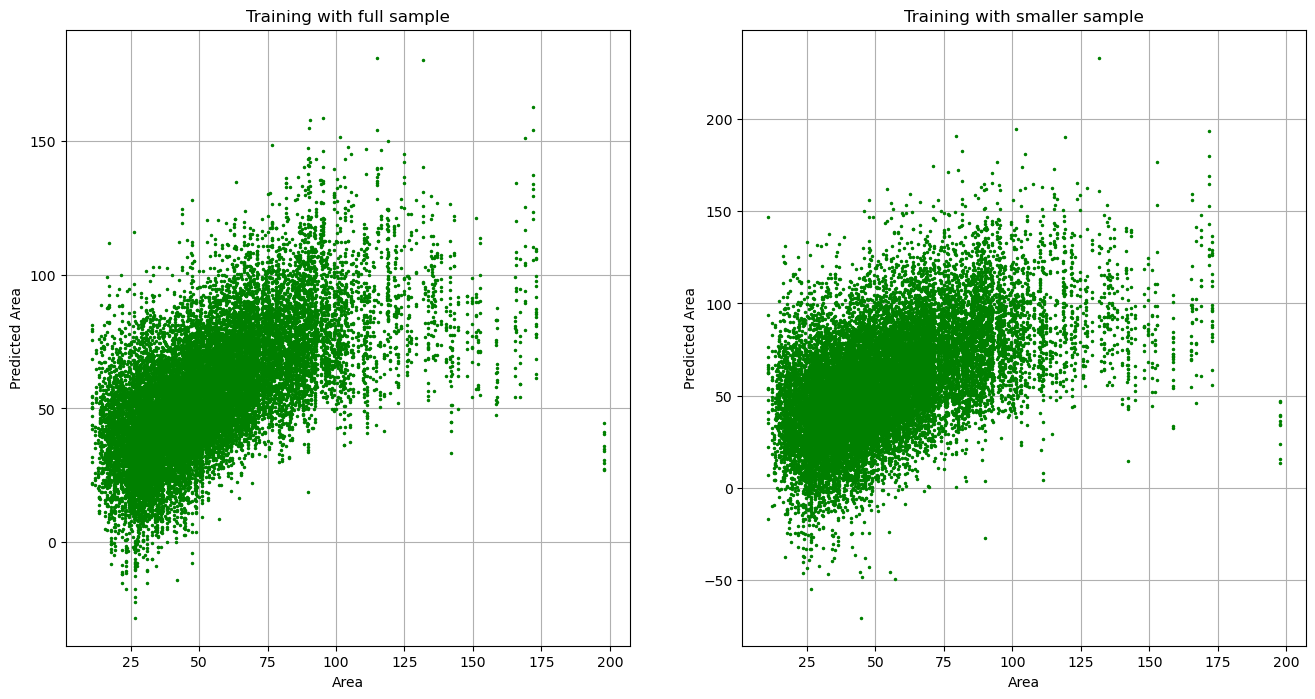

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_measurement

nuclei_measurement()

E_full, E_reduced = nuclei_measurement()

print(f"Full Model MSE: {E_full}")
print(f"Reduced Model MSE: {E_reduced}")     

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 1*: 
Implement the missing functionality for training a linear regression model for automatic measurement of the nuclei area. Evaluate the performance on the independent test dataset. The next lines of code plot the predicted vs. the actual area. What is your analysis of the results shown in the plot?

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*: 
Train a new linear regression model with a reduced number of training samples. Which model results in larger error on the testing set and why? 


## Task 1
The spread in the predicted area per area can be seen as the verticle line. Although there is a positive correlation, the spread of the points suggests a potential non-linear relationship. The points are densely clustered in the lower left part of the graph (around 0-100 for Predicted Area) and start to spread out as the area increases. The scatter indicates that there may still be room for improvement in the model, especially in capturing the variability for larger area values.

## Task 2
The calculated mean squared error is: 

Full Model MSE: 21.249374449040975

Reduced Model MSE: 26.93612678421345

It can be seen that the reduced model has a higher error. The graph shows that the axis for the predicted area is more spread. So the lowest predicted area is around -75  while the lowest predicted area from the full sample is around -50. The same can be seen for the maximum. While of course the min and max from the 'real' area stays the same. This explains why the error in the smaller sample is larger. This suggests that the full model, which likely uses more predictors or a more comprehensive dataset, captures the underlying patterns in the data more effectively.
This is expected because the smaller dataset has less data, from which the model can learn. A reduced model typically means fewer predictors or a smaller sample size, which can hinder the model's ability to capture complex relationships.

In both cases, the predicted area values fall outside the max and min from the actual area. The model attempts to infer a value (in this case, negative) that falls outside the range of what it has seen. The predictions from the reduced model include values lower than the minimum observed value (which is around 20 in this context), which indicates that the training data may not have adequately constrained the model. In essence, the model is "guessing" values that do not reflect the reality of the dataset it was trained on.
3

<div id='section_2'></div>

### B. Logistic regression for nuclei classification

The Python function `nuclei_classification()` implements the training of a logistic regression model that classifies nuclei into the classes "large" (class label $y = 1$) and "small" (class label $y = 0$). Examine the code and comments and make sure that you understand what it does. One notable difference from before is that this code uses the analytical expression for the gradient of the loss function, instead of computing it numerically with `ngradient` as before. Using `ngradient` will also work, but is much slower. The script is mostly complete. The only missing component is the values for the parameters of the training process.

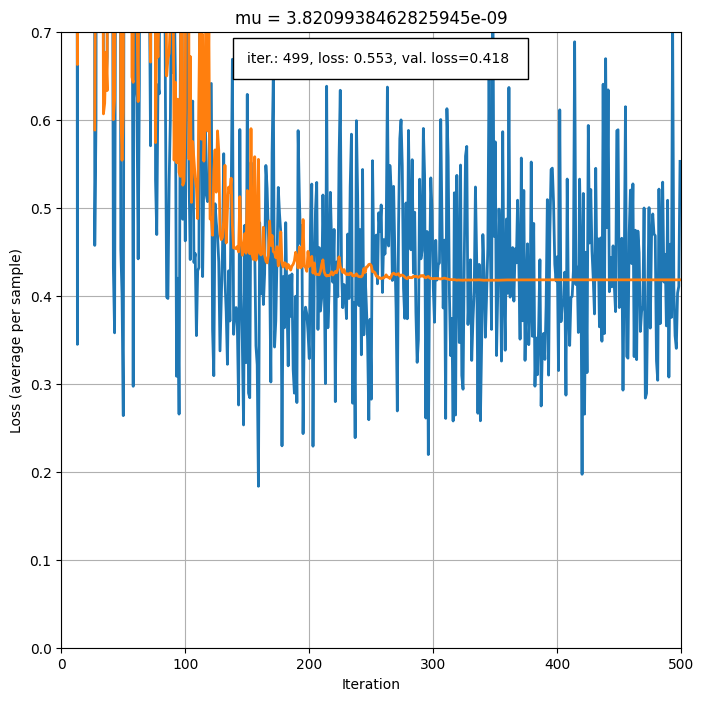

In [23]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_classification
from IPython.display import display, clear_output

nuclei_classification()


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 3*: 

1. Select values for the learning rate, batch size and number of iterations (these are sometimes called hyper-parameters of the model), as well as initial values for the model parameters that will result in fast training of an accurate model for this classification problem. Note that if you don't choose the hyper-parameters and initial parameters well, the resulting loss might be out of range of the plot.
    
    Experiment with a few variations of the parameters and analyze and compare the resulting loss curves. Describe how the different hyper-parameters influence the training process.
    
2. Instead of running gradient descent for a fixed number of iterations, can you propose a stopping criterion for the training?

3. Report the classification accuracy for your best trained model.

4. Reduce the size of the training set by a very large factor (e.g. 0.5% of the original number of samples). Train the model with this reduced number of samples. Does the model overfit the training dataset? How did you come to this conclusion?

<div id='section_3'></div>

### C. Neural network training for nuclei classification

The code in SECTION 3 of the `cad_test.py` file, enabled you to train a neural network that classifies whether the input image contains a large or small nuclei. During the training of this network the hyper parameters (i.e. batch size, learning rate, number of iterations, ...) have been kept fixed.
However, these parameters can be a crucial factor in optimizing your model results. Therefore we are going to investigate the effect of these parameters on the loss curve behaviour and accuracy of the model. To put the improvements in perspective, we are also going to compare these results to the Logistic Regression model (see Task 4.1).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 4*:

1. Select values for the learning rate, batch size and number of iterations similar to those used in Task 4. Analyze and compare the resulting loss curves with the loss curves obtained from the logistic regression. What do you observe? Also, report the accuracy of the methods you compare. Is there a best one?
2. Now, with a fixed set of hyper parameters, try to change the size of the hidden layer and report the obtained loss curves. How do the number of parameters of the model influence the loss curve? Can you think of an appropriate number of parameters for this dataset?


<div id='section_4'></div>

### D. Using $k$-NN for nuclei classification
In Notebook 2.1 we have introduced the $k$-NN algorithm, in Notebook 2.4 the PCA method was introduced. In this task we would like to combine these two to create a new classifier.
How does a clustering algorithm hold up against the algorithm you have implemented thus far?

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 5*:
1. Use the training set of the cell nuceli data for the $k$-NN algorithm. Next, use the test set to classify the images with this algorithm. How did you choose the parameter $k$? What happens to the accuracy when you first use PCA to reduce the dimensions on the data, how many components do you keep?
2. Report the accuracy, and compare it to the best performing neural network, logistic regression and linear regression models. What do you see?